**Installing all necessary packages!**

In [ ]:
!apt-get install -y gdal-bin python-gdal python3-gdal
!pip install GDAL==$(gdal-config --version) --global-option=build_ext --global-option="-I/usr/include/gdal"
!pip install netCDF4
!pip install pygrib
!pip install xarray netCDF4
!pip install keras-tuner

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Package 'python-gdal' has no installation candidate
DEPRECATION: --build-option and --global-option are deprecated. pip 24.2 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.3 MB/s eta 0:00:00


**Importing All necessary Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


**Mounting goolge drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Making a new folder inside google collab to work with. All data will be transferred to this folder.**

In [ ]:
import shutil

# Define the source and destination paths. please change this to your drive path if you are using your own account, make changes only if needed
source_folder = '/content/drive/MyDrive/TEMP_DATA_1BY1'
destination_folder = '/content/data'

# Copy the folder
shutil.copytree(source_folder, destination_folder)

print("Folder copied successfully!")

Folder copied successfully!


In [ ]:


# Define the base directory where the extracted data is located
base_dir = '/content/data'

# Function to list files in a directory
def list_files(directory):
    try:
        files = os.listdir(directory)
        return files
    except Exception as e:
        return str(e)

# List the contents of the base directory to confirm the path
base_files = list_files(base_dir)
print("Base Directory Files:")
print(base_files)

Base Directory Files:
['MinT', 'Processed', 'Research paper.pdf', 'README.txt', 'Temp.ctl', 'MeanT', 'MaxT']


In [ ]:


# Define the path to the dataset in Google Drive
base_dir = '/content/data'

# Define the paths to the directories containing temperature data
min_temp_dir = os.path.join(base_dir, 'MinT')
max_temp_dir = os.path.join(base_dir, 'MaxT')
mean_temp_dir = os.path.join(base_dir, 'MeanT')


In [ ]:


# List the files in each directory
min_temp_files = list_files(min_temp_dir)
max_temp_files = list_files(max_temp_dir)
mean_temp_files = list_files(mean_temp_dir)

print("MinT Directory Files:")
print(min_temp_files)

print("\nMaxT Directory Files:")
print(max_temp_files)

print("\nMeanT Directory Files:")
print(mean_temp_files)

MinT Directory Files:
['MinT_1972.GRD', 'MinT_2014.GRD', 'MinT_2007.GRD', 'MinT_2009.GRD', 'MinT_2012.GRD', 'MinT_1985.GRD', 'MinT_2005.GRD', 'MinT_1976.GRD', 'MinT_1961.GRD', 'MinT_1978.GRD', 'MinT_1974.GRD', 'MinT_1960.GRD', 'MinT_2010.GRD', 'MinT_1992.GRD', 'MinT_1959.GRD', 'MinT_1989.GRD', 'MinT_1958.GRD', 'MinT_2016.GRD', 'MinT_2001.GRD', 'MinT_1971.GRD', 'MinT_1969.GRD', 'MinT_1968.GRD', 'MinT_1997.GRD', 'MinT_1996.GRD', 'MinT_1970.GRD', 'MinT_1975.GRD', 'MinT_1962.GRD', 'MinT_1973.GRD', 'MinT_1995.GRD', 'MinT_1998.GRD', 'MinT_1957.GRD', 'MinT_1977.GRD', 'MinT_1991.GRD', 'MinT_1964.GRD', 'MinT_1983.GRD', 'MinT_2002.GRD', 'MinT_1980.GRD', 'MinT_1954.GRD', 'MinT_1984.GRD', 'MinT_1966.GRD', 'MinT_1956.GRD', 'MinT_1979.GRD', 'MinT_1986.GRD', 'MinT_1981.GRD', 'MinT_1955.GRD', 'MinT_2013.GRD', 'MinT_1988.GRD', 'MinT_1967.GRD', 'MinT_1993.GRD', 'MinT_2003.GRD', 'MinT_1987.GRD', 'MinT_2011.GRD', 'MinT_1953.GRD', 'MinT_2006.GRD', 'MinT_1990.GRD', 'MinT_2004.GRD', 'MinT_2000.GRD', 'MinT_20

**Extracting Data**

Once the environments has been set, It is important to transform the data into a usable form. beofre theat let us understand the structure of the data. Each GRD file has dimensions 365\*31\*31, This means that the 31*31 grid data of each day in an year is stored in a combined .GRD file.

the data stored in the variables max_temp_data, min_temp_data and mean_temp_data are the data in its pristine form without any alteration. Each row in these data contain a three dimensional element of dimensions 365\*31\*31

The data stored in combined_data variable is a bit more processed. state. the 31*31 grid is reduced to its mean value in this data. this leaves us with a list of 365 values as each element. Before reducing, the placeholder value of 99.9 is reduced to NaN vlues.

The data stored in working_data variable is further processed as the mean of 365 days are taken and each element is a single number. this dataframe is used for several plots throughout the experiment.

In [ ]:


def is_leap_year(year):
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

def load_grd_binary(file_path,days, dtype=np.float32):

    with open(file_path, 'rb') as f:
        data = np.fromfile(f, dtype=dtype)
        data[data == 99.9] = np.nan
        data = data.reshape(days, 31, 31)
        return data

def load_all_grd_files(data_dir, dtype=np.float32):

    data_dict = {}
    for file_name in sorted(os.listdir(data_dir)):
        if file_name.endswith('.GRD'):
            year = file_name.split('_')[-1].split('.')[0]  # Extract year from file name
            days_in_year = 366 if is_leap_year(int(year)) else 365
            file_path = os.path.join(data_dir, file_name)
            data_dict[int(year)] = load_grd_binary(file_path,days_in_year, dtype)
    return data_dict



# Load data from all three folders
max_temp_data = load_all_grd_files(max_temp_dir)
min_temp_data = load_all_grd_files(min_temp_dir)
mean_temp_data = load_all_grd_files(mean_temp_dir)
print(len(max_temp_data[1951]))

# Combine into a DataFrame
data_years = list(range(1951, 2015))
combined_data = pd.DataFrame({
    'Year': data_years,
    'Max Temperature': [np.nanmean(max_temp_data[year],axis=(1,2)) for year in data_years],
    'Min Temperature': [np.nanmean(min_temp_data[year],axis=(1,2)) for year in data_years],
    'Mean Temperature': [np.nanmean(mean_temp_data[year],axis=(1,2)) for year in data_years],
})

ANN_data = combined_data

working_data = combined_data.applymap(lambda x: np.mean(x))
print(working_data)


365
      Year  Max Temperature  Min Temperature  Mean Temperature
0   1951.0        31.071442        19.205683         25.138578
1   1952.0        31.092651        19.353998         25.223333
2   1953.0        30.966005        19.559635         25.262823
3   1954.0        30.539337        19.218479         24.878912
4   1955.0        30.409552        18.981205         24.695372
..     ...              ...              ...               ...
59  2010.0        31.296848        19.483637         25.407427
60  2011.0        30.813164        18.702271         24.766314
61  2012.0        30.863350        18.626810         24.747374
62  2013.0        30.617292        18.862860         24.751108
63  2014.0        31.112543        18.800047         25.145859

[64 rows x 4 columns]


<ipython-input-8-c9638e4d6e8c>:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  working_data = combined_data.applymap(lambda x: np.mean(x))


**Turning all the data into time series data**

In [ ]:
# Convert the 'Year' column to a datetime format (setting it to the first day of the year)
working_data['Year'] = pd.to_datetime(working_data['Year'], format='%Y')

# Set the 'Year' column as the index
working_data.set_index('Year', inplace=True)

# Now 'df' is a time series
print(working_data)

# Optional: Resample the data if you need more granularity (e.g., converting yearly to monthly data)
df_resampled = working_data.resample('M').ffill()  # Resampling monthly and forward-filling data

print(df_resampled)

            Max Temperature  Min Temperature  Mean Temperature
Year                                                          
1951-01-01        31.071442        19.205683         25.138578
1952-01-01        31.092651        19.353998         25.223333
1953-01-01        30.966005        19.559635         25.262823
1954-01-01        30.539337        19.218479         24.878912
1955-01-01        30.409552        18.981205         24.695372
...                     ...              ...               ...
2010-01-01        31.296848        19.483637         25.407427
2011-01-01        30.813164        18.702271         24.766314
2012-01-01        30.863350        18.626810         24.747374
2013-01-01        30.617292        18.862860         24.751108
2014-01-01        31.112543        18.800047         25.145859

[64 rows x 3 columns]
            Max Temperature  Min Temperature  Mean Temperature
Year                                                          
1951-01-31        31.071442     

the df_final variable contains the fully processed time series data with month and days are filled in.

In [ ]:
df = ANN_data
df_exploded = df.explode(['Max Temperature', 'Min Temperature', 'Mean Temperature'])
print(df_exploded)

df = df_exploded


def generate_dates_for_year(year):
    if year % 4 == 0 and (year % 100 != 0 or year % 400 == 0):
        # Leap year (366 days)
        dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    else:
        # Regular year (365 days)
        dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    return dates

# Create a list to hold all dates
dates = []

# Loop through each unique year in the dataframe
for year in df['Year'].unique():
    dates.extend(generate_dates_for_year(year))

# Add the dates to the dataframe
df['Date'] = dates

# Now you have Year, Date, Max Temp, Min Temp, and Mean Temp in your DataFrame
df = df[['Date', 'Year', 'Max Temperature', 'Min Temperature', 'Mean Temperature']]

# Set the 'Date' as the index
df.set_index('Date', inplace=True)

# Display the first few rows
df_final = df.drop('Year', axis=1)
print(df_final)

    Year Max Temperature Min Temperature Mean Temperature
0   1951       23.956347        9.582933        16.769402
0   1951       24.024881        9.125659          16.5756
0   1951       24.048801        8.908442        16.478773
0   1951       24.216917        9.104821        16.661049
0   1951       24.293505        9.699042        16.996378
..   ...             ...             ...              ...
63  2014       23.359728        8.902286        16.356693
63  2014       23.163801        8.747883         16.04529
63  2014       23.658211        8.994591        16.538464
63  2014       23.518246        9.449413        16.646353
63  2014       23.270067       10.777685        17.317402

[23376 rows x 4 columns]
           Max Temperature Min Temperature Mean Temperature
Date                                                       
1951-01-01       23.956347        9.582933        16.769402
1951-01-02       24.024881        9.125659          16.5756
1951-01-03       24.048801        8.90

**Univariate and multivariate analysis**

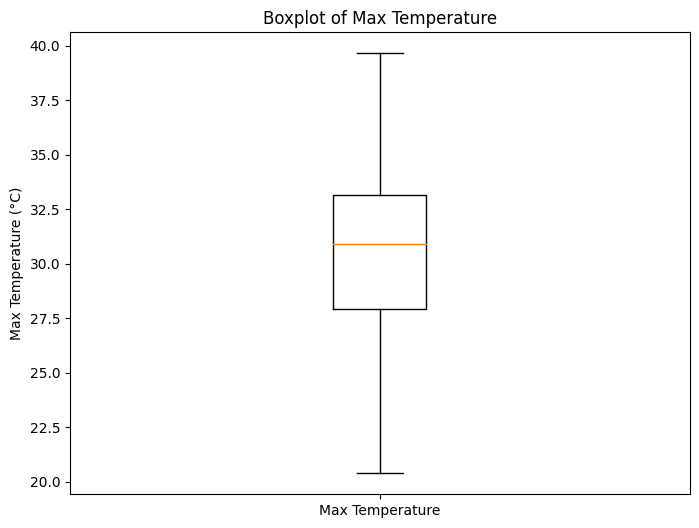

In [ ]:



plt.figure(figsize=(8, 6))
plt.boxplot(df_final['Max Temperature'])
plt.title('Boxplot of Max Temperature')
plt.ylabel('Max Temperature (°C)')
plt.xticks([1], ['Max Temperature'])
plt.show()


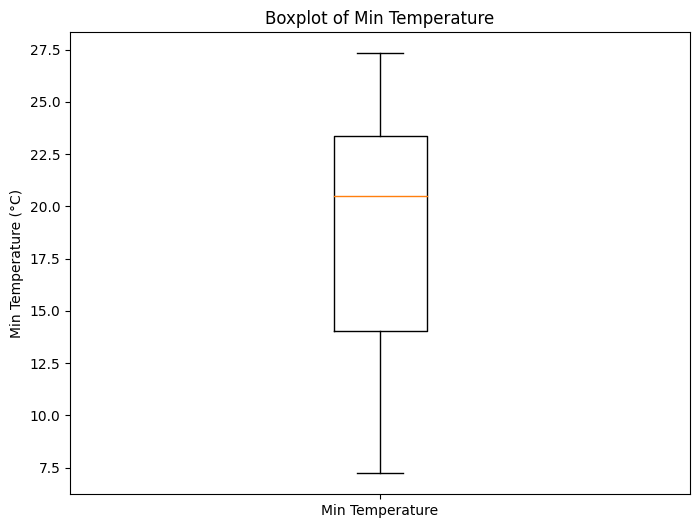

In [ ]:


plt.figure(figsize=(8, 6))
plt.boxplot(df_final['Min Temperature'])
plt.title('Boxplot of Min Temperature')
plt.ylabel('Min Temperature (°C)')
plt.xticks([1], ['Min Temperature'])
plt.show()

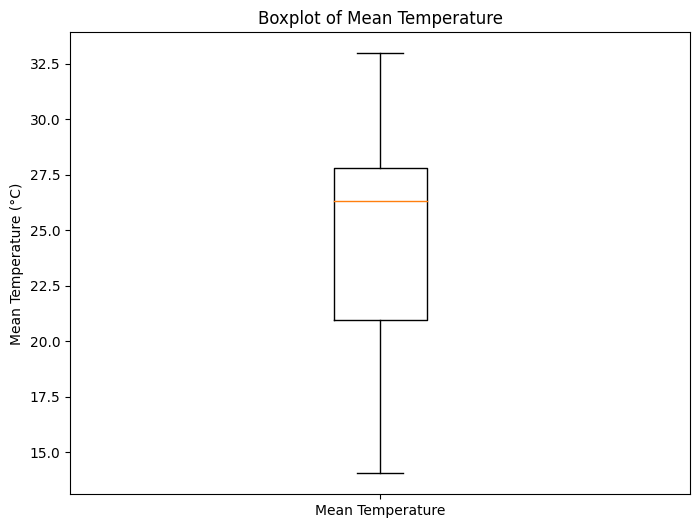

In [ ]:



plt.figure(figsize=(8, 6))
plt.boxplot(df_final['Mean Temperature'])
plt.title('Boxplot of Mean Temperature')
plt.ylabel('Mean Temperature (°C)')
plt.xticks([1], ['Mean Temperature'])
plt.show()

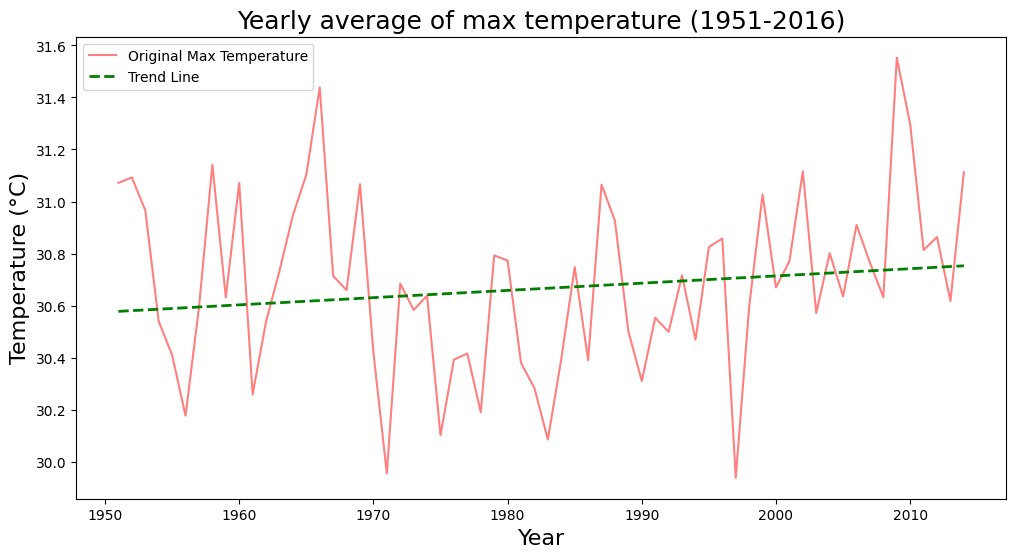

In [ ]:


df = working_data
window_size = 4
df['Smoothed Max Temperature'] = df['Max Temperature'].rolling(window=window_size).mean()

# Create a linear regression model to fit the trend line
X = np.arange(len(df)).reshape(-1, 1)
y = df['Smoothed Max Temperature'].values

# Ensure there are no NaN values in the smoothed data
X = X[~np.isnan(y)]
y = y[~np.isnan(y)]

model = LinearRegression()
model.fit(X, y)
trend_line = model.predict(np.arange(len(df)).reshape(-1, 1))

# Plotting the original, smoothed data, and trend line
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Max Temperature'], label='Original Max Temperature', color='red', alpha=0.5)
plt.plot(df.index, trend_line, label='Trend Line', color='green', linestyle='--', linewidth=2)

# Adding labels and title
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=16)
plt.title('Yearly average of max temperature (1951-2016)', fontsize=18)
plt.legend()

# Show plot
plt.show()



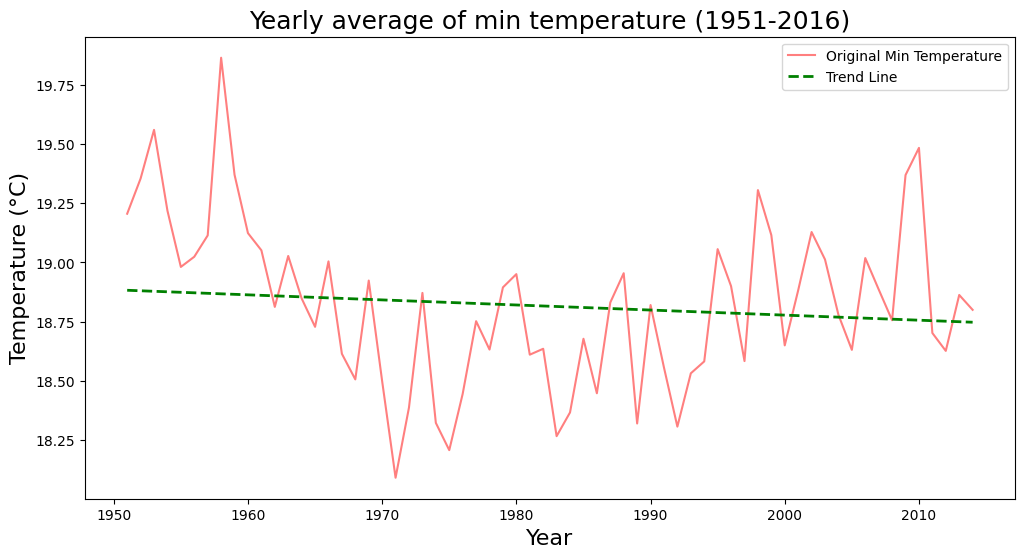

In [ ]:


df = working_data
window_size = 5
df['Smoothed Min Temperature'] = df['Min Temperature'].rolling(window=window_size).mean()

# Create a linear regression model to fit the trend line
X = np.arange(len(df)).reshape(-1, 1)
y = df['Smoothed Min Temperature'].values

# Ensure there are no NaN values in the smoothed data
X = X[~np.isnan(y)]
y = y[~np.isnan(y)]

model = LinearRegression()
model.fit(X, y)
trend_line = model.predict(np.arange(len(df)).reshape(-1, 1))

# Plotting the original, smoothed data, and trend line
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Min Temperature'], label='Original Min Temperature', color='red', alpha=0.5)

plt.plot(df.index, trend_line, label='Trend Line', color='green', linestyle='--', linewidth=2)

# Adding labels and title
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=16)
plt.title('Yearly average of min temperature (1951-2016)', fontsize=18)
plt.legend()

# Show plot
plt.show()


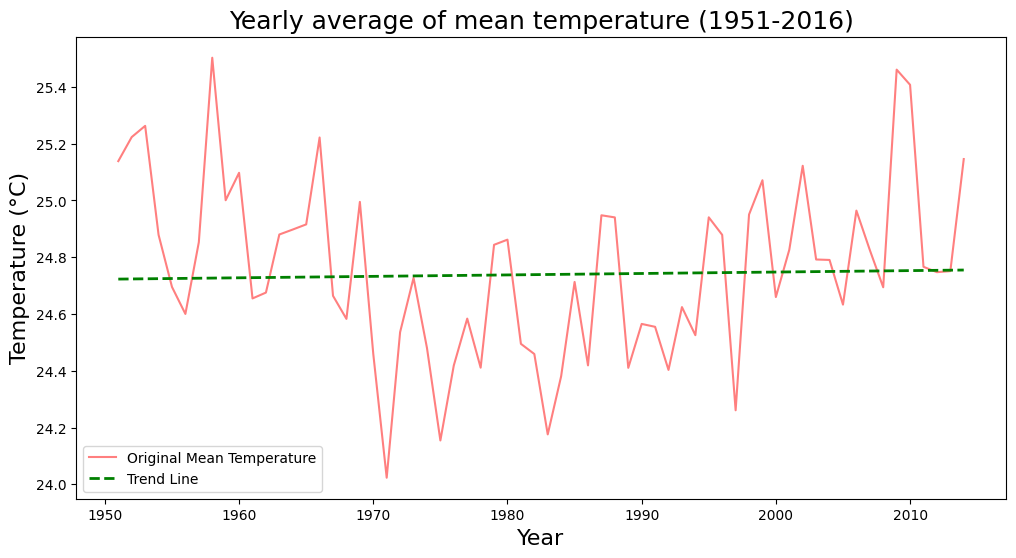

In [ ]:


df = working_data
window_size = 5
df['Smoothed Mean Temperature'] = df['Mean Temperature'].rolling(window=window_size).mean()

# Create a linear regression model to fit the trend line
X = np.arange(len(df)).reshape(-1, 1)
y = df['Smoothed Mean Temperature'].values

# Ensure there are no NaN values in the smoothed data
X = X[~np.isnan(y)]
y = y[~np.isnan(y)]

model = LinearRegression()
model.fit(X, y)
trend_line = model.predict(np.arange(len(df)).reshape(-1, 1))

# Plotting the original, smoothed data, and trend line
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Mean Temperature'], label='Original Mean Temperature', color='red', alpha=0.5)

plt.plot(df.index, trend_line, label='Trend Line', color='green', linestyle='--', linewidth=2)

# Adding labels and title
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=16)
plt.title('Yearly average of mean temperature (1951-2016)', fontsize=18)
plt.legend()

# Show plot
plt.show()


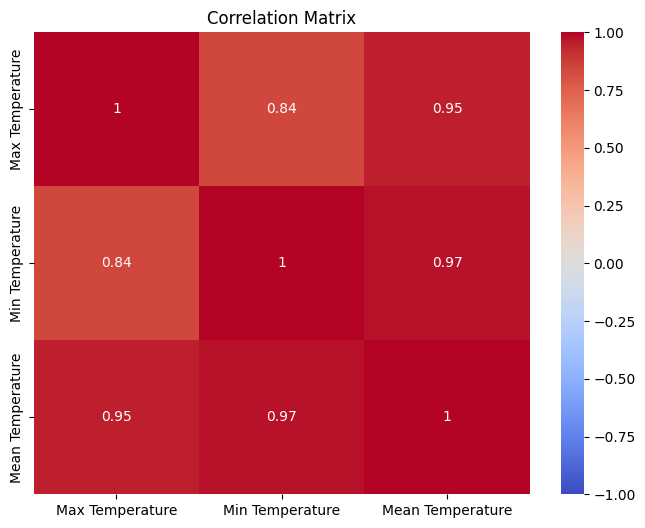

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_final.corr()
#plot the matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

From the corrplot above, we can understand that mean temperature has a near perfect correlation with both max temperature and min temperture. This would lead to unstable models and its generally better to avoid using this parameter to predict both max temperature and min temperature.

one reason could be that mean temperature is derived from both max and min temperature.

**Hyperparameter tuning and Model Prediction**

**Linear Regression Model**

Best Parameters: {'fit_intercept': True}
Mean Error: -0.02613245586374101
Mean Squared Error (MSE): 4.290765053530998
Root Mean Squared Error (RMSE): 2.0714161951503125
Correlation Coefficient: 0.8397045146397145


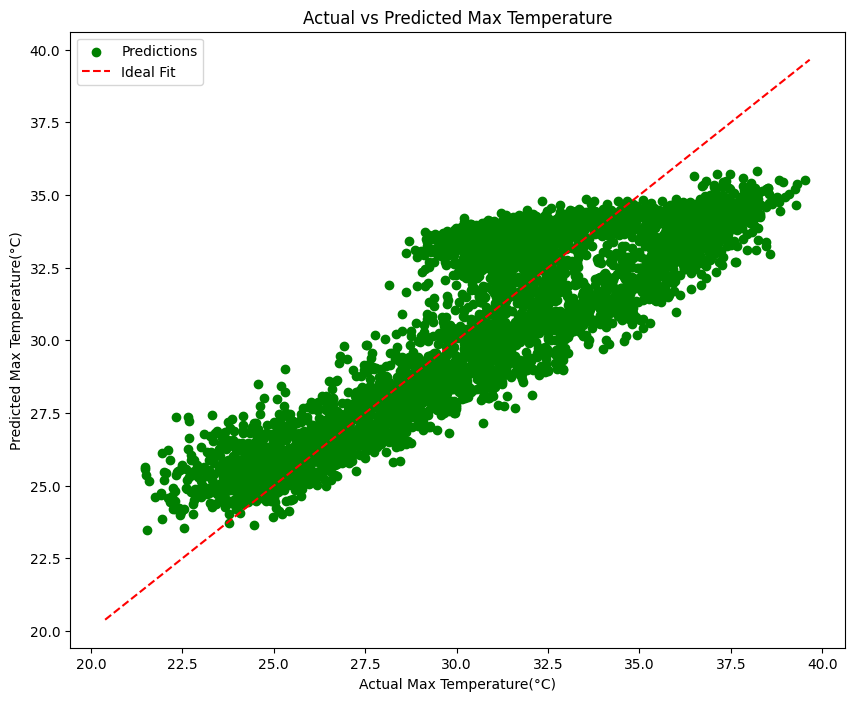

In [ ]:

df = df_final


X = df[['Min Temperature']]
y = df['Max Temperature']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = LinearRegression()

# Define hyperparameters for tuning
param_grid = {
    'fit_intercept': [True, False]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mean_error = np.mean(y_pred - y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
correlation_coefficient, _ = pearsonr(y_test, y_pred)

# Print performance metrics
print(f'Mean Error: {mean_error}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Correlation Coefficient: {correlation_coefficient}')

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='green', label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Max Temperature(°C)')
plt.ylabel('Predicted Max Temperature(°C)')
plt.title('Actual vs Predicted Max Temperature')
plt.legend()
plt.show()


**Support Vector Machine**

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'C': 100, 'degree': 2, 'epsilon': 1.0, 'kernel': 'rbf'}
SVM Mean Error: -0.23459551745988041
SVM Mean Squared Error (MSE): 3.3475870221341713
SVM Root Mean Squared Error (RMSE): 1.8296412277094576
SVM Correlation Coefficient: 0.8852024460785788


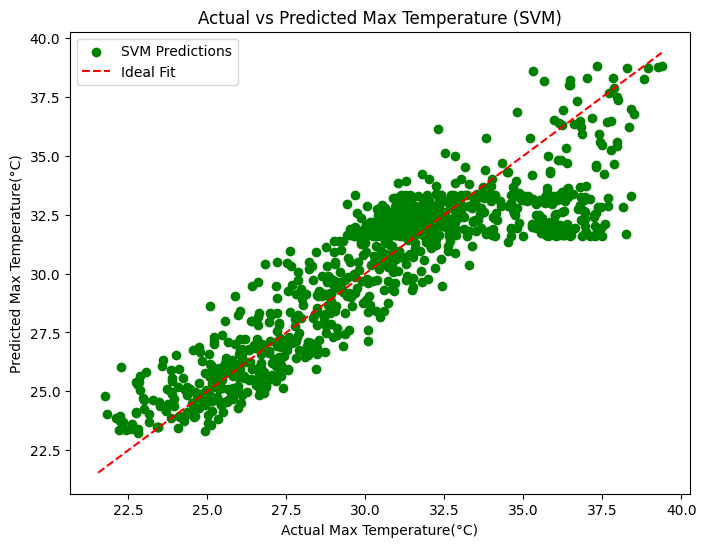

In [ ]:


df = df_final
df = df.sample(n=5000)


X = df[['Min Temperature']]
y = df['Max Temperature']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM model
model_svm = SVR()

# Define the hyperparameters grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1.0],
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Perform Grid Search with cross-validation
grid_search_svm = GridSearchCV(model_svm, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search_svm.best_params_)

# Use the best model
best_svm_model = grid_search_svm.best_estimator_

# Train the best model
best_svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Calculate performance metrics of the model
mean_error_svm = np.mean(y_pred_svm - y_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
correlation_coefficient_svm, _ = pearsonr(y_test, y_pred_svm)

# Print performance metrics
print(f'SVM Mean Error: {mean_error_svm}')
print(f'SVM Mean Squared Error (MSE): {mse_svm}')
print(f'SVM Root Mean Squared Error (RMSE): {rmse_svm}')
print(f'SVM Correlation Coefficient: {correlation_coefficient_svm}')

# Plotting the predicted vs actual values of SVM
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svm, color='green', label='SVM Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Max Temperature(°C)')
plt.ylabel('Predicted Max Temperature(°C)')
plt.title('Actual vs Predicted Max Temperature (SVM)')
plt.legend()
plt.show()


**Artificial Neural Network**

Trial 254 Complete [00h 02m 30s]
val_loss: 3.9653565883636475

Best val_loss So Far: 3.2679481506347656
Total elapsed time: 01h 18m 57s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN Mean Error: 0.4580535590648651
ANN Mean Squared Error (MSE): 3.7020583152770996
ANN Root Mean Squared Error (RMSE): 1.924073338508606
ANN Correlation Coefficient: 0.8727203136623424


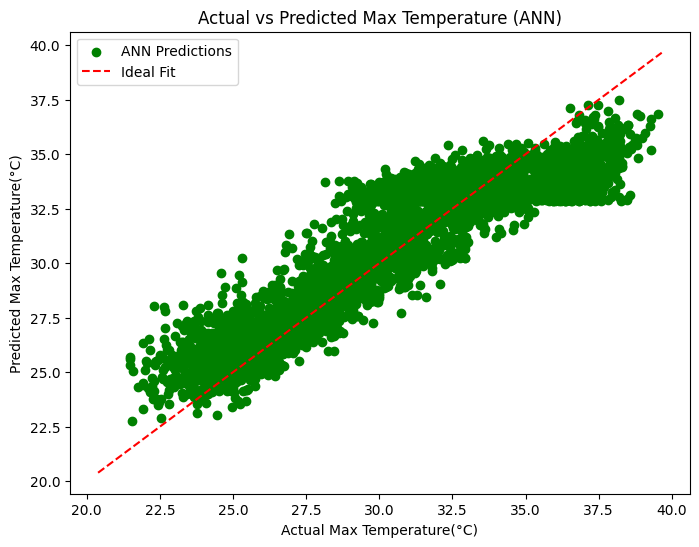

In [ ]:



df = df_final
df = df.astype(np.float32)


X = df[['Min Temperature']]
y = df['Max Temperature']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model building function for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units1', min_value=32, max_value=128, step=32),
        activation='relu',
        input_dim=1
    ))
    model.add(Dense(
        units=hp.Int('units2', min_value=16, max_value=64, step=16),
        activation='relu'
    ))
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-1, sampling='LOG')
        ),
        loss='mean_squared_error'
    )
    return model

# Create the Keras Tuner object
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=100,
    factor=3,
    directory='my_dir',
    project_name='intro_to_kt'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=100, validation_split=0.2)

# Get the best hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model_ann = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters obtained
history = model_ann.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Make predictions
y_pred_ann = model_ann.predict(X_test).flatten()

# Calculate performance metrics
mean_error_ann = np.mean(y_pred_ann - y_test)
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
correlation_coefficient_ann, _ = pearsonr(y_test, y_pred_ann)

# Print performance metrics
print(f'ANN Mean Error: {mean_error_ann}')
print(f'ANN Mean Squared Error (MSE): {mse_ann}')
print(f'ANN Root Mean Squared Error (RMSE): {rmse_ann}')
print(f'ANN Correlation Coefficient: {correlation_coefficient_ann}')

# Plotting the predicted vs actual values of ANN
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ann, color='green', label='ANN Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Max Temperature(°C)')
plt.ylabel('Predicted Max Temperature(°C)')
plt.title('Actual vs Predicted Max Temperature (ANN)')
plt.legend()
plt.show()


In [ ]:
print(best_hps.values)

{'units1': 128, 'units2': 16, 'learning_rate': 0.010066872951858362, 'tuner/epochs': 100, 'tuner/initial_epoch': 34, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0242'}


In [ ]:
data = {
    'Metrics': ['Mean Error', 'Mean Squared Error', 'Root Mean Squared Error','Correlation Coefficient'],
    'Linear Regression': [mean_error, mse, rmse,correlation_coefficient],
    'SVM': [mean_error_svm, mse_svm, rmse_svm,correlation_coefficient_svm],
    'ANN': [mean_error_ann, mse_ann, rmse_ann, correlation_coefficient_ann]
}

# Create the DataFrame
results_df = pd.DataFrame(data)
results_df=results_df.round(2)

# Display the DataFrame
print(results_df)

                   Metrics  Linear Regression   SVM   ANN
0               Mean Error              -0.03 -0.23  0.46
1       Mean Squared Error               4.29  3.35  3.70
2  Root Mean Squared Error               2.07  1.83  1.92
3  Correlation Coefficient               0.84  0.89  0.87


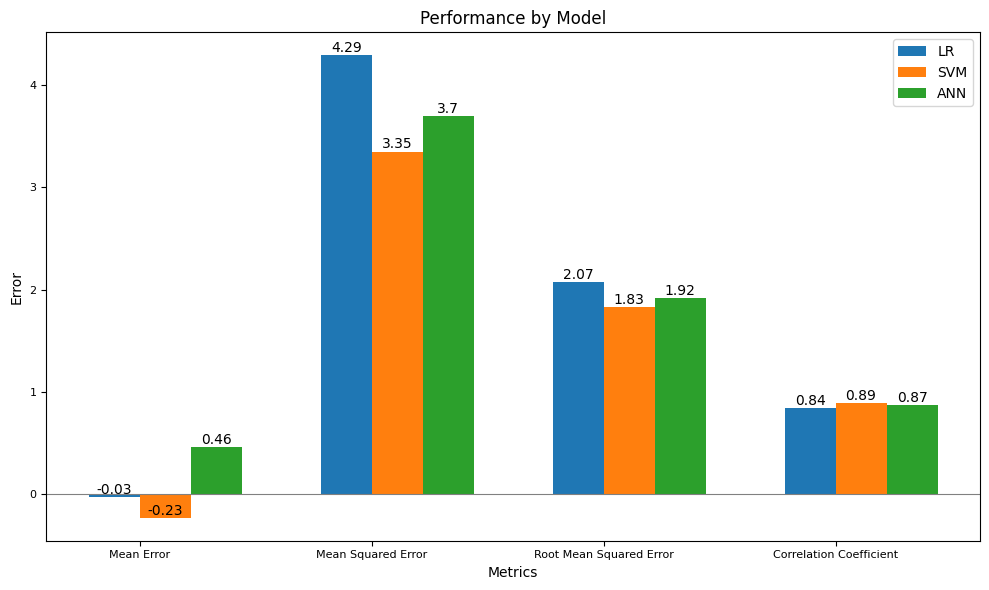

In [ ]:
bar_width = 0.22
index = np.arange(len(results_df['Metrics']))

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(index, results_df['Linear Regression'], bar_width, label='LR')
bars2 = ax.bar(index + bar_width, results_df['SVM'], bar_width, label='SVM')
bars3 = ax.bar(index + 2*bar_width, results_df['ANN'], bar_width, label='ANN')



# Adding labels and title to the plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Error')
ax.axhline(0, color='grey', linewidth=0.8)
ax.set_title('Performance by Model')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(results_df['Metrics'])
ax.legend()

# Adding values on top of the bars for better visualization
for bars in [bars1, bars2,bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')


plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
pip install numpy pandas matplotlib geopandas rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 31.7 MB/s eta 0:00:00
